# 이변량_숫자 vs 숫자

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 상관분석 라이브러리
import scipy.stats as spst

In [2]:
# 타이타닉 데이터 불러오기
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 뉴욕시 공기 오염도 데이터 불러오기
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
# air['Month'] = air.Date.dt.month
# air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


# 1. 산점도

* 상관 분석
    * 상관 분석은 연속형 변수 X에 대한 연속형 변수 Y의 관계를 분석할 때 사용
    * Scatter를 통해 시각화
* 가설 : 온도(x)가 상승하면 아이스크림 판매량(y)을 증가할까?
    * 어떤 관계가 보이나요?
    * 얼마나 강한 관계인가요?
* 숫자 vs 숫자를 비교할 때 중요한 관점이 **‘직선’ (Linearity)**

### 1) 산점도
    - plt.scatter( x축 값, y축 값 )
    - plt.scatter( ‘x변수’, ‘y변수’, data = df)
    - sns.scatterplot(x='', y='', data = df)

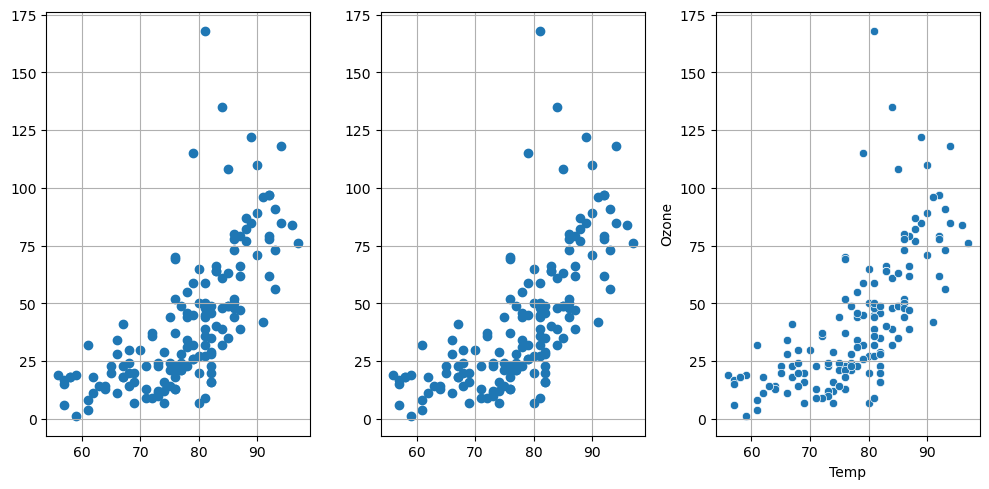

In [4]:
# plt.scatter(x, y)
plt.figure(figsize=(10,5))             # 그래프 사이즈 조정
plt.subplot(1,3,1)                     # 1행 3열 1번째
plt.scatter(air['Temp'], air['Ozone'])
plt.grid()                             # 그리드O


# plt.scatter( ‘x변수’, ‘y변수’, data = df)
plt.subplot(1,3,2)
plt.scatter('Temp', 'Ozone', data = air)
plt.grid()


# sns.scatterplot(x='', y='', data = df)
plt.subplot(1,3,3)
sns.scatterplot(x='Temp', y='Ozone', data = air)
plt.grid()
plt.tight_layout()                       # 그래프간 간격 적절하게 맞추기
plt.show()

# sns.scatterplot()은 x축, y축 제목 자동 설정

In [ ]:
# ### 산점도를 보고 생각해보세요.   ####
# - 강한 양의 선형관계를 가지고 있음. 0.5 < r < 1
# - temp가 오를수록 ozone의 농도가 높아짐. 
# - 80에서 아웃라이어 존재?
# - temp가 80이하까지는 ozone농도가 0에 근접한 값이 다수 분포 

(연습) Temp, Wind, Solar.R 과 Ozone 과의 관계를 시각화 해 봅시다.

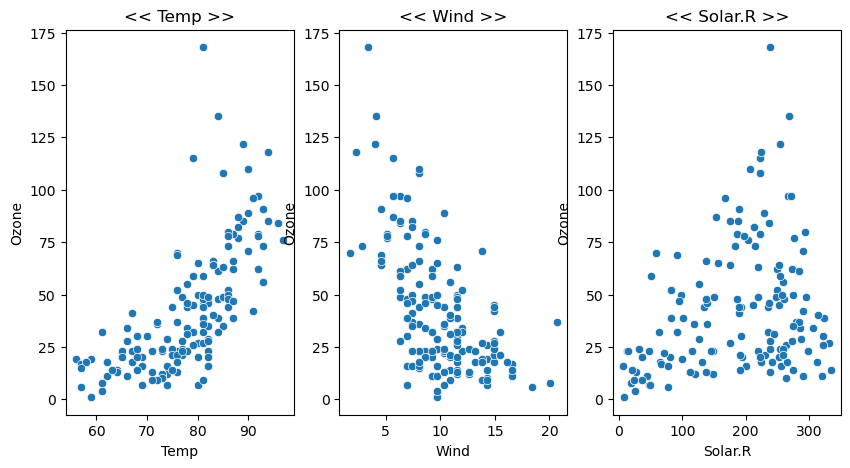

In [5]:
# for문 돌려서 1행3열 3개의 그래프를 한 번에 그림.
b = ['Temp', 'Wind', 'Solar.R']
plt.figure(figsize=(10,5))
for i, v in enumerate(b):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=v, y='Ozone', data=air)
    plt.title(f'<< {v} >>')
plt.show()



In [ ]:
# Ozone과 Wind는 강력한 음의 상관관계를 갖는다. 
# Temp와는 양의 상관관계를 갖는다.
# Solar.R은 상관관계가 없음. 

두 변수와의 관계

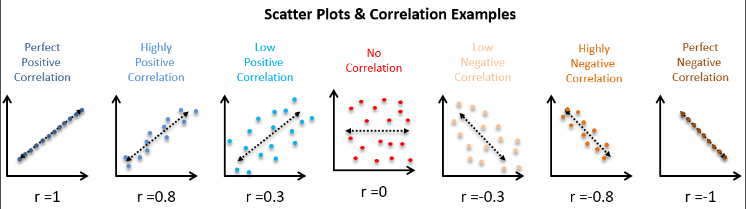

$ $

### 2) pairplot으로 한꺼번에 시각화
    - sns.pairplot(df)

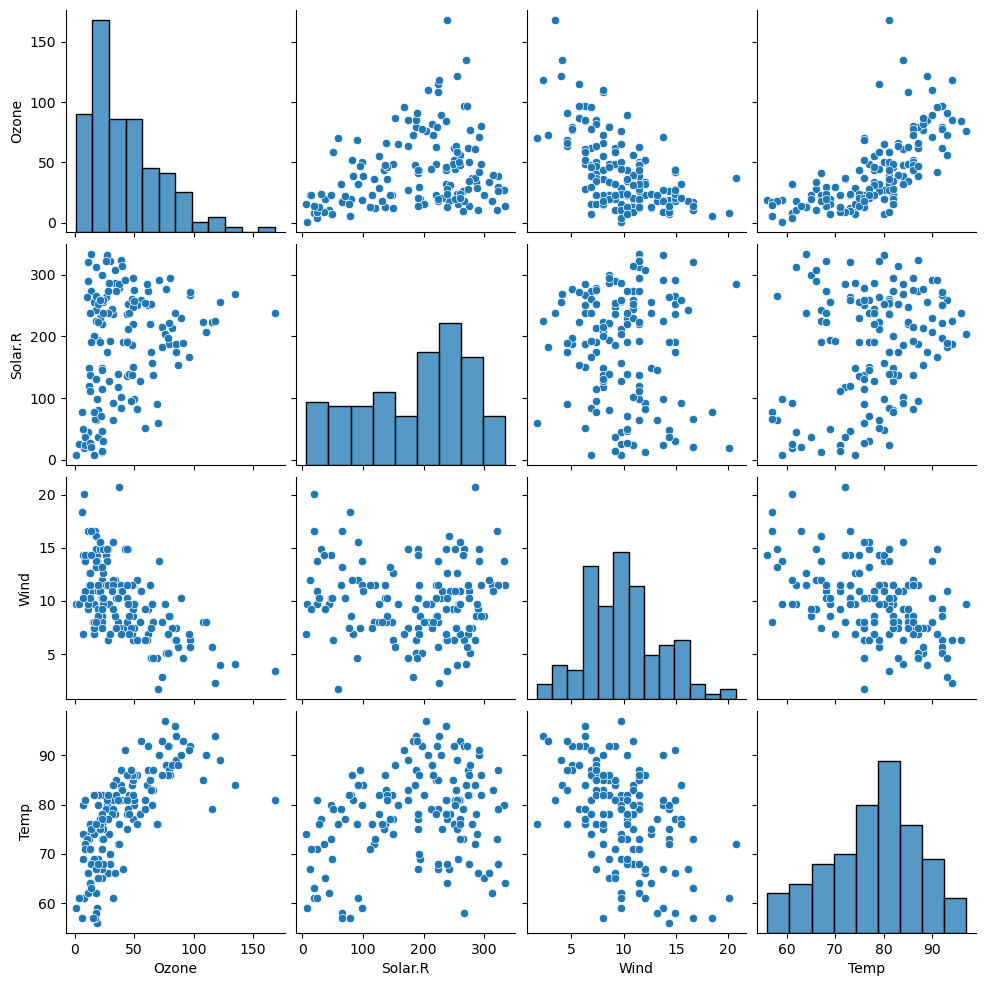

In [6]:
sns.pairplot(air)
plt.show()

### 3)  jointplot 로 살펴보기
    - sns.jointplot(df)
    - jointplot은 산점도와 각각의 히스토그램을 함께 보여줍니다.

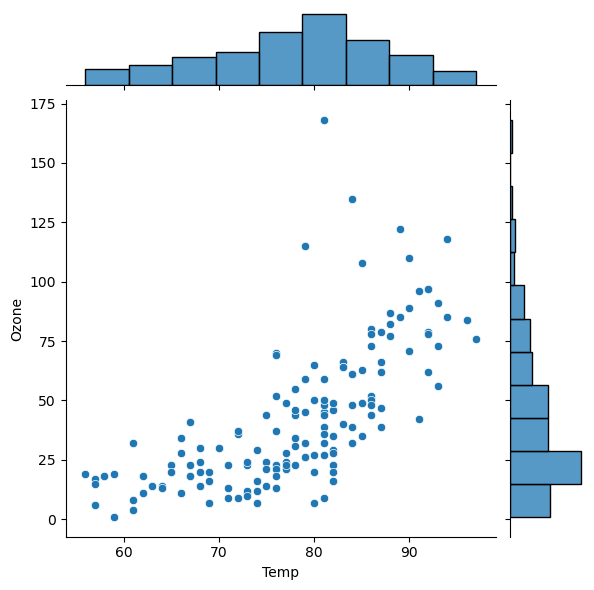

In [7]:
# Temp -> Ozone
sns.jointplot(x='Temp', y='Ozone', data = air)
plt.show()

### 4) 회귀선 추가된 산점도
    - sns.regplot(x='', y='', data=df)

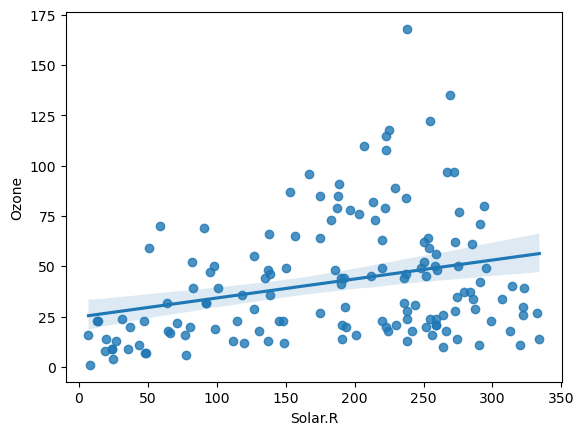

In [8]:
# reggression = 회귀선 추가된 산점도.
sns.regplot(x='Solar.R', y='Ozone', data = air)
plt.show()

$ $

$ $

# 2. 수치화: 상관분석

### 1) 상관계수, P-value

* 상관계수 𝑟
    * 공분산을 표준화 한 값
    * -1 ~ 1 사이의 값
    * -1, 1에 가까울 수록 강한 상관관계를 나타냄.

* 경험에 의한 대략의 기준(절대적인 기준이 절대 아닙니다.)
    * 강한 : 0.5 < |𝑟| ≤ 1
    * 중간 : 0.2 < |𝑟| ≤ 0.5
    * 약한 : 0.1 < |𝑟| ≤ 0.2
    * (거의)없음 : |𝑟| ≤ 0.1
* 주의사항: 값에 NaN이 있으면 계산되지 않음. 반드시 **.notnull()** 로 제외하고 수행해야 한다.     

In [9]:
# 상관분석 라이브러리 불러오기
import scipy.stats as spst

In [10]:
# 상관계수와 p-value 
spst.pearsonr(air['Temp'], air['Ozone'])

# PearsonRResult(상관계수, p-value)
# p-value < 0.05  ==> 통계적으로 유의미하다.

PearsonRResult(statistic=0.6833717861490114, pvalue=2.197769800200274e-22)

### 2) 데에터프레임 한번에 상관계수 구하기
- df.corr()

In [11]:
air.corr()

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.280068,-0.605478,0.683372
Solar.R,0.280068,1.000000,-0.056792,0.275840
Wind,-0.605478,-0.056792,1.000000,-0.457988
Temp,0.683372,0.275840,-0.457988,1.000000


In [ ]:
# - 같은 변수끼리 구한 값은 1  ==> 의미 없다
# - |+-1|에 가까울 수록 강한 상관관계
# - 0에 가까울 수록 약한 상관관계
# - +는 양의 상관관계, -는 음의 상관관계

### 3) 상관계수를 heatmap으로 시각화
- cmap(color map) : https://matplotlib.org/stable/tutorials/colors/colormaps.html

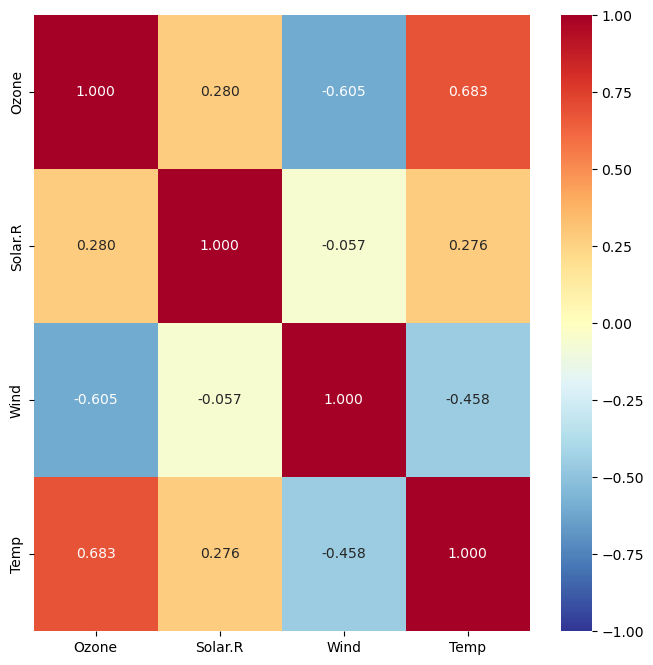

In [12]:
plt.figure(figsize = (8, 8))
sns.heatmap(air.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

$ $

# 3. 연습

In [13]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* medv : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== Target
* crim 범죄율
* zn 25,000 평방피트를 초과 거주지역 비율
* indus 비소매상업지역 면적 비율
* chas 찰스강변 위치(범주 : 강변1, 아니면 0)
* nox 일산화질소 농도
* rm 주택당 방 수
* age 1940년 이전에 건축된 주택의 비율
* dis 직업센터의 거리
* rad 방사형 고속도로까지의 거리
* tax 재산세율
* ptratio 학생/교사 비율
* lstat 인구 중 하위 계층 비율

In [14]:
# boston 전체 변수에 대한 상관계수 구하기
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [ ]:
# medv(집값)과 가장 상관관계가 높은 변수들
# rm(주택당 방 수): r=0.6953
# lstat(인구 중 하위 계층 비율): r=-0.7376	

# medv(집값)과 가장 상관관계가 낮은 변수
# chas(찰스강변 위치): r=0.1752



In [15]:
## 함수 만들어서 처리

def bos(data, feature, target):
    # 산점도
    sns.scatterplot(x=feature, y=target, data=data)   
    plt.grid()
    plt.show()
    
    # 피어슨 상관계수 구하기
    result = spst.pearsonr(data[feature], data[target])
    print(f'상관계수: {result[0]}, P-value: {result[1]}')



### 1) rm(주택당 방 수) --> medv(집값)

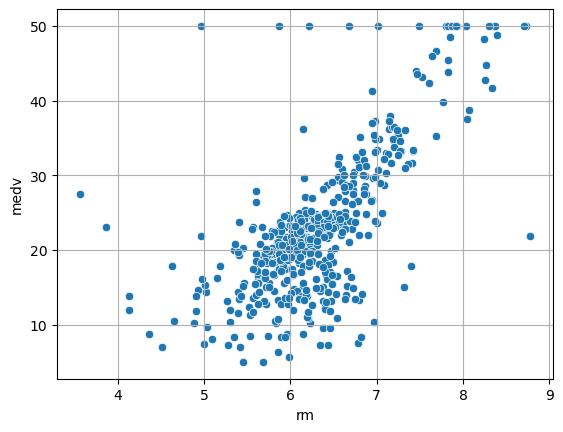

상관계수: 0.6953599470715393, P-value: 2.487228871007442e-74


In [16]:
# rm(주택당 방 수) --> medv(집값)
# 산점도 + 상관분석 수행
feature = 'rm'
target = 'medv'
bos(boston, feature, target)



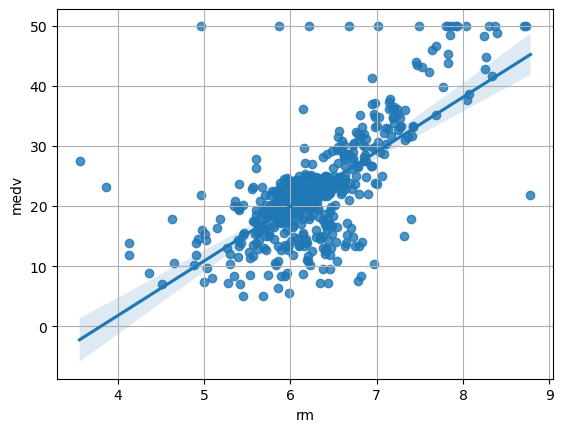

In [17]:
# 회귀선 추가해서 시각화 해보기

sns.regplot(x=feature, y=target, data=boston)
plt.grid()
plt.show()

In [ ]:
# ##  rm(주택당 방 수) --> medv(집값)
# - p-value=0.0000x, r=0.695 
#     -> 통계적으로 유의미하며, 높은 양의 상관관계를 가지고 있다.
#     -> 주택당 방 수가 많을수록 집값이 비싸다는 것을 알 수 있다.



$ $

### 2) lstat(인구 중 하위 계층 비율) --> medv(집값)

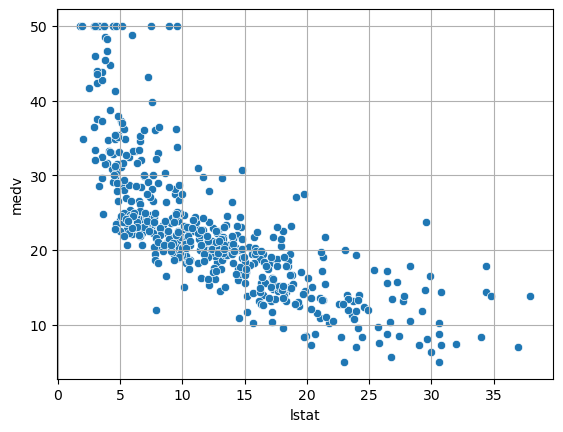

상관계수: -0.7376627261740148, P-value: 5.08110339438697e-88


In [18]:
# 산점도 + 상관분석 수행
feature = 'lstat'
target = 'medv'
bos(boston, feature, target)

In [ ]:
# # lstat(인구 중 하위 계층 비율) --> medv(집값)¶
# - p-value=0.00000x, r=-0.7376
#     -> 통계적으로 유의미하며, 강한 음의 상관관계를 가지고 있다.
#     -> 하위 계층 비율이 높을 수록 집값이 낮은 것을 확인할 수 있다.